In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from analysis import get_data
from analysis import read_log, read_logs
from analysis import generate_average

In [2]:
def plot_benchmark_by_size(df, size=None, tag=None, files=None, x="processors", y="time"):
    names = "-".join(files)
    sns.lineplot(data=df, x=x, y=y, hue="name");
    t = tag.title()
    label = f"{t}, Size={size}".replace("_", " ")
    plt.title(f"{label}")
    if "time" in y: y = f"{y}/s"
    if "time" in x: x = f"{x}/s"
    plt.xlabel(x.capitalize())
    plt.ylabel(y.capitalize())
    plt.savefig(f"images/by-size-{size}-{tag}-{names}.png")
    plt.savefig(f"images/by-size-{size}-{tag}-{names}.pdf")

In [3]:
def calculate_speedup(size):
    tag = "multiprocessing_mergesort"
    files = ["alex", "gregor"]
    data = []

    for file in files:
        _data = read_log(file, size=size)
        data = data + _data
    
    # print data
    print(data)

    df = pd.DataFrame(data = data, 
                      columns = ["processors", "time", "size", "name", "tag"])
    # df["speedup"] = df["time"].max()  / df["time"] 
    print(df["time"])

    plot_benchmark_by_size(df, size, tag, files)
    plt.show()

    # calculate average
    avg = pd.DataFrame()
    for name in files:
        _df = generate_average(df, tag="multiprocessing_mergesort", name=name, size=size)
        avg = pd.concat([avg, _df])
    print(avg)

    # calculate speedup
    speedup = pd.DataFrame(avg)
    # speedup["p"] = speedup.index.get_level_values(0).astype(float)

    frames = []
    for name in files:
        # select all times with given user name
        df = speedup[speedup['name'] == name]
        time_for_one_processor = df.query('processors == 1').iat[0, 0]
        # calculate speedup by dividing time by time taken using one processor 
        df['speedup'] = df["time"].rdiv(time_for_one_processor)
        frames.append(df)

    result = pd.concat(frames)
    print(result)

    plot_benchmark_by_size(result, size=size, tag=tag, files=files, x="processors", y="speedup")
    plt.show()
    

[[12, 0.814, 1000, 'alex', 'multiprocessing_mergesort'], [12, 0.665, 1000, 'alex', 'multiprocessing_mergesort'], [12, 0.644, 1000, 'alex', 'multiprocessing_mergesort'], [12, 0.641, 1000, 'alex', 'multiprocessing_mergesort'], [12, 0.632, 1000, 'alex', 'multiprocessing_mergesort'], [12, 0.644, 1000, 'alex', 'multiprocessing_mergesort'], [12, 0.66, 1000, 'alex', 'multiprocessing_mergesort'], [12, 0.654, 1000, 'alex', 'multiprocessing_mergesort'], [12, 0.735, 1000, 'alex', 'multiprocessing_mergesort'], [12, 0.682, 1000, 'alex', 'multiprocessing_mergesort'], [11, 0.622, 1000, 'alex', 'multiprocessing_mergesort'], [11, 0.599, 1000, 'alex', 'multiprocessing_mergesort'], [11, 0.609, 1000, 'alex', 'multiprocessing_mergesort'], [11, 0.652, 1000, 'alex', 'multiprocessing_mergesort'], [11, 0.641, 1000, 'alex', 'multiprocessing_mergesort'], [11, 0.708, 1000, 'alex', 'multiprocessing_mergesort'], [11, 0.673, 1000, 'alex', 'multiprocessing_mergesort'], [11, 0.649, 1000, 'alex', 'multiprocessing_merge

/var/folders/9z/_9vl5v9s7mgc48qt12wb56d40000gr/T/ipykernel_80562/213761165.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['speedup'] = df["time"].rdiv(time_for_one_processor)


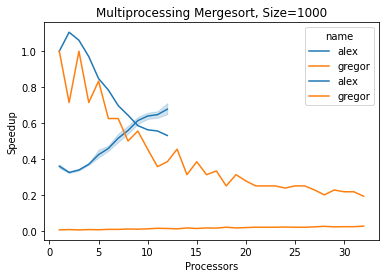

In [4]:
size = 1000
calculate_speedup(size)
